# ***SMA Project***



## **Measuring User’s Influence in Twitter**

## Web Scrapping 

In [16]:
pip install preprocessor

In [17]:
pip install fire

In [18]:
pip install tweet-preprocessor

In [20]:
import nltk

In [19]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

True

In [22]:
#importing the necessary libraries needed for web scraping
from requests import get
from requests.exceptions import RequestException
from contextlib import closing
from bs4 import BeautifulSoup
import pandas as pd
import os, sys
import re
import tweepy
from tweepy import OAuthHandler
import preprocessor as p
import seaborn as sns
import fire

In [23]:
def simple_get(url):
    """
    """
    try:
        with closing(get(url, stream=True)) as resp:
            if is_good_response(resp):
                return resp.content  #.encode(BeautifulSoup.original_encoding)
            else:
                return None

    except RequestException as e:
        log_error('Error during requests to {0} : {1}'.format(url, str(e)))
        return None


def is_good_response(resp):
    """
    Returns True if the response seems to be HTML, False otherwise.
    """
    content_type = resp.headers['Content-Type'].lower()
    return (resp.status_code == 200 
            and content_type is not None 
            and content_type.find('html') > -1)


def log_error(e):
    """
    """
    print(e)
    
def get_elements(url, tag='',search={}, fname=None):
    """
    """
    
    if isinstance(url,str):
        response = simple_get(url)
    else:
        #if already it is a loaded html page
        response = url

    if response is not None:
        html = BeautifulSoup(response, 'html.parser')
        
        res = []
        if tag:    
            for li in html.select(tag):
                for name in li.text.split('\n'):
                    if len(name) > 0:
                        res.append(name.strip())
    
                       
                
        if search:
            soup = html            
            
            
            r = ''
            if 'find' in search.keys():
                print('findaing',search['find'])
                soup = soup.find(**search['find'])
                r = soup

                
            if 'find_all' in search.keys():
                print('findaing all of',search['find_all'])
                r = soup.find_all(**search['find_all'])
   
            if r:
                for x in list(r):
                    if len(x) > 0:
                        res.extend(x)
                            
        return res

    # Raise an exception if we failed to get any data from the url
    raise Exception('Error retrieving contents at {}'.format(url))    
    
    
if get_ipython().__class__.__name__ == '__main__':
    fire(get_tag_elements)

**Obtaining the african top twitter influencers data from a website and cleaning the data to get their twitter username**

In [24]:
#python code to obtain 100 African Twitter Influencers
res = get_elements('https://www.businessinsider.co.za/the-biggest-twitter-profiles-south-africa-trevor-noah-elon-musk-bonang-2019-5', tag='h2')
res.reverse()

#converting the list into string
list_inf = str(res)

#deriving the top 100 african twitter influencers using regex
listinf = re.findall(r"@[\w]*", list_inf)
count = 1
print("""\nTop African Twitter Influencers:
         \n--------------------------------\n""")
for aff in listinf:
    print (f"{count}. {aff}")
    count = count+1

#saving data as csv file
dat = pd.DataFrame(listinf, columns=['Influencers'])
dat.to_csv('top_african_influencers_.csv')


Top African Twitter Influencers:
         
--------------------------------

1. @ABdeVilliers17
2. @KP24
3. @bonang_m
4. @MinnieDlamini
5. @News24
6. @DJZinhle
7. @Julius_S_Malema
8. @SuperSportTV
9. @casspernyovest
10. @PearlThusi


## Twitter API

In [25]:
#Variables that contains the user credentials to access Twitter API 
consumer_key = 'qprNvAYFLJ0PI3TDgLN5jOXSh'
consumer_secret = 'oPNiksEiB1ljDospQlaYPZIdrV5EkvHYx6HFkHTRKGcRFogCuG'
access_token = '1449350837407465473-EPnn7XP2nOUNFstG2poP2tmA4SRatw'
access_token_secret = 'afj6I7No4UpiBjhg2blWou62BCTtJXNubQniZwgdLn70y'            

#This handles Twitter authetification and the connection to Twitter Streaming API
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
               
api = tweepy.API(auth)
api = tweepy.API(auth, wait_on_rate_limit=True)

**Obtaining the follower count, friend count, number of tweets and screen name for african influencers from the Twitter API**

In [26]:
#getting the followers count, following, number of tweets, and screen name of the african influencers
followers_count = {}
following_count ={}
num_of_tweets = {}
screen_name = {}

for count in range(len(listinf)): 
    try:
        user = api.get_user(listinf[count])
        followers_count[listinf[count]]= user.followers_count
        following_count[listinf[count]] = user.friends_count
        num_of_tweets[listinf[count]] = user.statuses_count
        screen_name[listinf[count]] = user.screen_name
    except Exception as e:
        pass

In [27]:
#adding the follower_count, following_count, number of tweets, and screen name as a new column in the influencers dataframe
dat['Follower_count']= dat['Influencers'].map(followers_count)
dat['Following_count']= dat['Influencers'].map(following_count)
dat['Number_of_Tweets']= dat['Influencers'].map(num_of_tweets)
dat['Screen_name']= dat['Influencers'].map(screen_name)

#removing rows with no values
dat.dropna(inplace=True)

#condition to only choose influencers with more than 1000 followers
dat = dat[dat['Follower_count'] > 1000]

#removing rows with duplicate values and keeping the first occurrence
dat.drop_duplicates(subset='Screen_name', keep="first", inplace=True)
dat.set_index('Screen_name')

,Influencers,Follower_count,Following_count,Number_of_Tweets
Screen_name,,,,
ABdeVilliers17,@ABdeVilliers17,8238903.0,182.0,5672.0
KP24,@KP24,3832358.0,426.0,25510.0
MinnieDlamini,@MinnieDlamini,4222761.0,917.0,25170.0
News24,@News24,4351590.0,719.0,384088.0
DJZinhle,@DJZinhle,3316862.0,9312.0,71637.0
Julius_S_Malema,@Julius_S_Malema,3636438.0,655.0,42742.0
SuperSportTV,@SuperSportTV,2986185.0,592.0,331881.0
casspernyovest,@casspernyovest,3482559.0,1351.0,195644.0
PearlThusi,@PearlThusi,2917892.0,6232.0,24985.0


**Obtaining the follower count, friend count, number of tweets from the Twitter API**

**python code to search and download tweets of influencers.**

In [28]:
#python code to search and download tweets of influencers.
#importing all the necessary libraries needed
import sys
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import re
import string

# to view all columns
pd.set_option("display.max.columns", None)

#Import the necessary methods from tweepy library  
import tweepy
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream

#sentiment analysis package
from textblob import TextBlob

#general text pre-processor
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords

#tweet pre-processor 
import preprocessor as p

In [29]:
class tweetsearch():
    '''
    This is a basic class to search and download twitter data.
    You can build up on it to extend the functionalities for more 
    sophisticated analysis
    '''
    def __init__(self, cols=None,auth=None):
        #
        if not cols is None:
            self.cols = cols
        else:
            self.cols = ['id', 'created_at', 'source', 'original_text','clean_text', 
                    'sentiment','polarity','subjectivity', 'lang',
                    'favorite_count', 'retweet_count', 'original_author',   
                    'possibly_sensitive', 'hashtags',
                    'user_mentions', 'place', 'place_coord_boundaries']
            
        if auth is None:
            
            #Variables that contains the user credentials to access Twitter API 
            consumer_key = 'qprNvAYFLJ0PI3TDgLN5jOXSh'
            consumer_secret = 'oPNiksEiB1ljDospQlaYPZIdrV5EkvHYx6HFkHTRKGcRFogCuG'
            access_token = '1449350837407465473-EPnn7XP2nOUNFstG2poP2tmA4SRatw'
            access_token_secret = 'afj6I7No4UpiBjhg2blWou62BCTtJXNubQniZwgdLn70y' 
            


            #This handles Twitter authetification and the connection to Twitter Streaming API
            auth = OAuthHandler(consumer_key, consumer_secret)
            auth.set_access_token(access_token, access_token_secret)
            

        #            
        self.auth = auth
        self.api = tweepy.API(auth)
        self.api = tweepy.API(auth, wait_on_rate_limit=True) 
        self.filtered_tweet = ''
        
    
    def limit_handled(cursor, list_name):
        while True:
            try:
                yield cursor.next()
            except tweepy.RateLimitError:
                print("\nCurrent number of data points in list = " + str(len(list_name)))
                print('Hit Twitter API rate limit.')
                for i in range(3, 0, -1):
                  print("Wait for {} mins.".format(i * 5))
                  time.sleep(5 * 60)
            except tweepy.error.TweepError:
                print('\nCaught TweepError exception' )       

    def clean_tweets(self, twitter_text):

        #use pre processor
        tweet = p.clean(twitter_text)

         #HappyEmoticons
        emoticons_happy = set([
            ':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}',
            ':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',
            '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P',
            'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)',
            '<3'
            ])

        # Sad Emoticons
        emoticons_sad = set([
            ':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<',
            ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c',
            ':c', ':{', '>:\\', ';('
            ])

        #Emoji patterns
        emoji_pattern = re.compile("["
                 u"\U0001F600-\U0001F64F"  # emoticons
                 u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                 u"\U0001F680-\U0001F6FF"  # transport & map symbols
                 u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                 u"\U00002702-\U000027B0"
                 u"\U000024C2-\U0001F251"
                 "]+", flags=re.UNICODE)

        #combine sad and happy emoticons
        emoticons = emoticons_happy.union(emoticons_sad)

        stop_words = set(stopwords.words('english'))
        word_tokens = nltk.word_tokenize(tweet)
        #after tweepy preprocessing the colon symbol left remain after      
        #removing mentions
        tweet = re.sub(r':', '', tweet)
        tweet = re.sub(r'‚Ä¶', '', tweet)

        #replace consecutive non-ASCII characters with a space
        tweet = re.sub(r'[^\x00-\x7F]+',' ', tweet)

        #remove emojis from tweet
        tweet = emoji_pattern.sub(r'', tweet)

        #filter using NLTK library append it to a string
        filtered_tweet = [w for w in word_tokens if not w in stop_words]

        #looping through conditions
        filtered_tweet = []    
        for w in word_tokens:
        #check tokens against stop words , emoticons and punctuations
            if w not in stop_words and w not in emoticons and w not in string.punctuation:
                filtered_tweet.append(w)

        return ' '.join(filtered_tweet)            

    def get_tweets(self, user, csvfile=None):
        
        
        df = pd.DataFrame(columns=self.cols)
        
        if not csvfile is None:
            #If the file exists, then read the existing data from the CSV file.
            if os.path.exists(csvfile):
                df = pd.read_csv(csvfile, header=0)
            

        #page attribute in tweepy.cursor and iteration
        for page in tweepy.Cursor(api.user_timeline, id=user, include_rts=False).pages(20):

            # the you receive from the Twitter API is in a JSON format and has quite an amount of information attached
            for status in page:
                
                new_entry = []
                status = status._json
                
                #filter by language
                if status['lang'] != 'en':
                    continue

                
                #if this tweet is a retweet update retweet count
                if status['created_at'] in df['created_at'].values:
                    i = df.loc[df['created_at'] == status['created_at']].index[0]
                    #
                    cond1 = status['favorite_count'] != df.at[i, 'favorite_count']
                    cond2 = status['retweet_count'] != df.at[i, 'retweet_count']
                    if cond1 or cond2:
                        df.at[i, 'favorite_count'] = status['favorite_count']
                        df.at[i, 'retweet_count'] = status['retweet_count']
                    continue

                #calculate sentiment
                filtered_tweet = self.clean_tweets(status['text'])
                blob = TextBlob(filtered_tweet)
                Sentiment = blob.sentiment     
                polarity = Sentiment.polarity
                subjectivity = Sentiment.subjectivity

                new_entry += [status['id'], status['created_at'],
                              status['source'], status['text'], filtered_tweet, 
                              Sentiment,polarity,subjectivity, status['lang'],
                              status['favorite_count'], status['retweet_count']]

                new_entry.append(status['user']['screen_name'])

                try:
                    is_sensitive = status['possibly_sensitive']
                except KeyError:
                    is_sensitive = None

                new_entry.append(is_sensitive)

                hashtags = ", ".join([hashtag_item['text'] for hashtag_item in status['entities']['hashtags']])
                new_entry.append(hashtags) #append the hashtags

                #
                mentions = ", ".join([mention['screen_name'] for mention in status['entities']['user_mentions']])
                new_entry.append(mentions) #append the user mentions

                try:
                    xyz = status['place']['bounding_box']['coordinates']
                    coordinates = [coord for loc in xyz for coord in loc]
                except TypeError:
                    coordinates = None
                #
                new_entry.append(coordinates)

                try:
                    location = status['user']['location']
                except TypeError:
                    location = ''
                #
                new_entry.append(location)

                #now append a row to the dataframe
                single_tweet_df = pd.DataFrame([new_entry], columns=self.cols)
                df = df.append(single_tweet_df, ignore_index=True)

        if not csvfile is None:
            #save it to file
            df.to_csv(csvfile, columns=self.cols, index=False, encoding="utf-8")
            
        return df

In [30]:
"""
#creating a csv file for the influencers twitter data and
calling the tweetsearch function
"""
tweets_file2 = 'Influencers.csv'
ts = tweetsearch()

#getting the data for the top African Influencers
for handle in dat['Influencers']:
    ##get data on username
    df = ts.get_tweets(handle, csvfile=tweets_file2)  
    print("Printing for user:",handle)

Printing for user: @ABdeVilliers17
Printing for user: @KP24
Printing for user: @MinnieDlamini
Printing for user: @News24
Printing for user: @DJZinhle
Printing for user: @Julius_S_Malema
Printing for user: @SuperSportTV
Printing for user: @casspernyovest
Printing for user: @PearlThusi


**Calculating popularity score, reach score and relevance score of the african influencers**

In [31]:
#importing the twitter data for top african influencers
data_inf = pd.read_csv(tweets_file2)

#creating a dataframe from the data imported
inf_df = pd.DataFrame(data_inf)

#python code to calculate the total retweets and likes 
new2 = inf_df.groupby('original_author', sort=False)['favorite_count','retweet_count'].agg('sum')
new2.columns = ['Favorite_count','Retweet_count']

#merging the previous dataframe with the favorite count and retweet count
new_inf_df = pd.merge(dat, new2, left_on='Screen_name', right_on='original_author', how='outer')
new_inf_df.dropna(inplace=True)

#calculating the popularity score
new_inf_df['Popularity_score'] = new_inf_df['Retweet_count'] + new_inf_df['Favorite_count']

#calculating the reach score
new_inf_df['Reach_score'] = new_inf_df['Follower_count'] - new_inf_df['Following_count']
new_inf_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Influencers,Follower_count,Following_count,Number_of_Tweets,Screen_name,Favorite_count,Retweet_count,Popularity_score,Reach_score
0,@ABdeVilliers17,8238903.0,182.0,5672.0,ABdeVilliers17,4474591,353553,4828144,8238721.0
1,@KP24,3832358.0,426.0,25510.0,KP24,806344,49787,856131,3831932.0
2,@MinnieDlamini,4222761.0,917.0,25170.0,MinnieDlamini,559137,29120,588257,4221844.0
3,@News24,4351590.0,719.0,384088.0,News24,28751,7461,36212,4350871.0
4,@DJZinhle,3316862.0,9312.0,71637.0,DJZinhle,83383,6337,89720,3307550.0
5,@Julius_S_Malema,3636438.0,655.0,42742.0,Julius_S_Malema,94290,16287,110577,3635783.0
6,@SuperSportTV,2986185.0,592.0,331881.0,SuperSportTV,100638,13826,114464,2985593.0
7,@casspernyovest,3482559.0,1351.0,195644.0,casspernyovest,228386,20472,248858,3481208.0
8,@PearlThusi,2917892.0,6232.0,24985.0,PearlThusi,241844,15485,257329,2911660.0


# **Results**

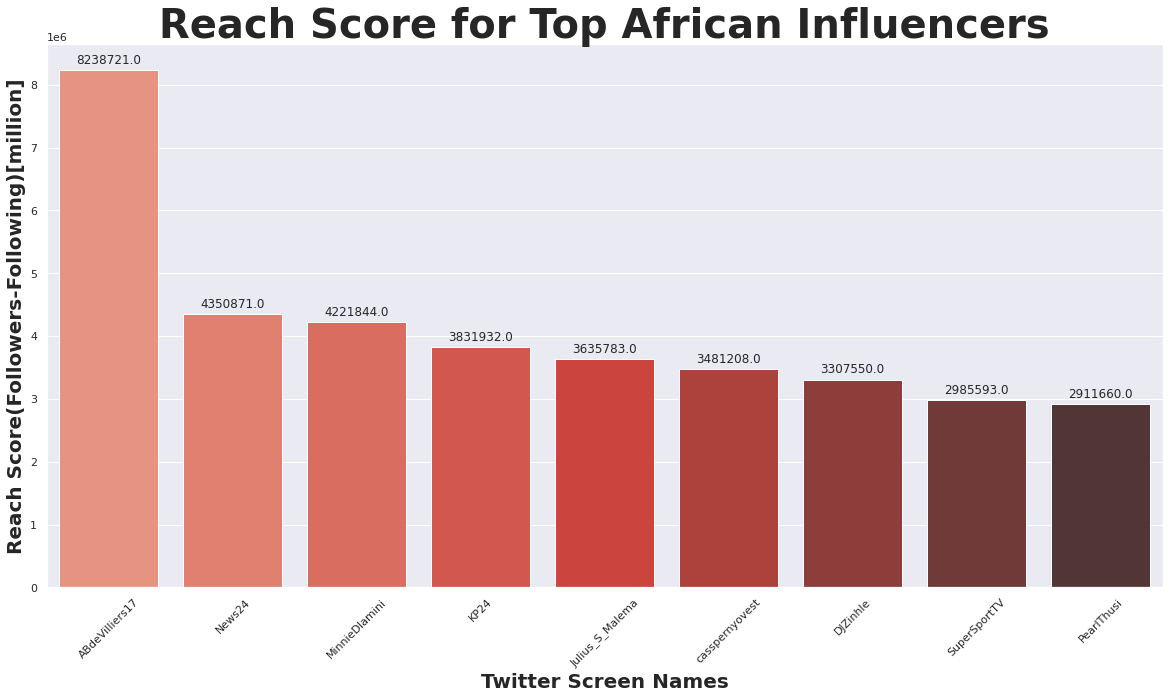

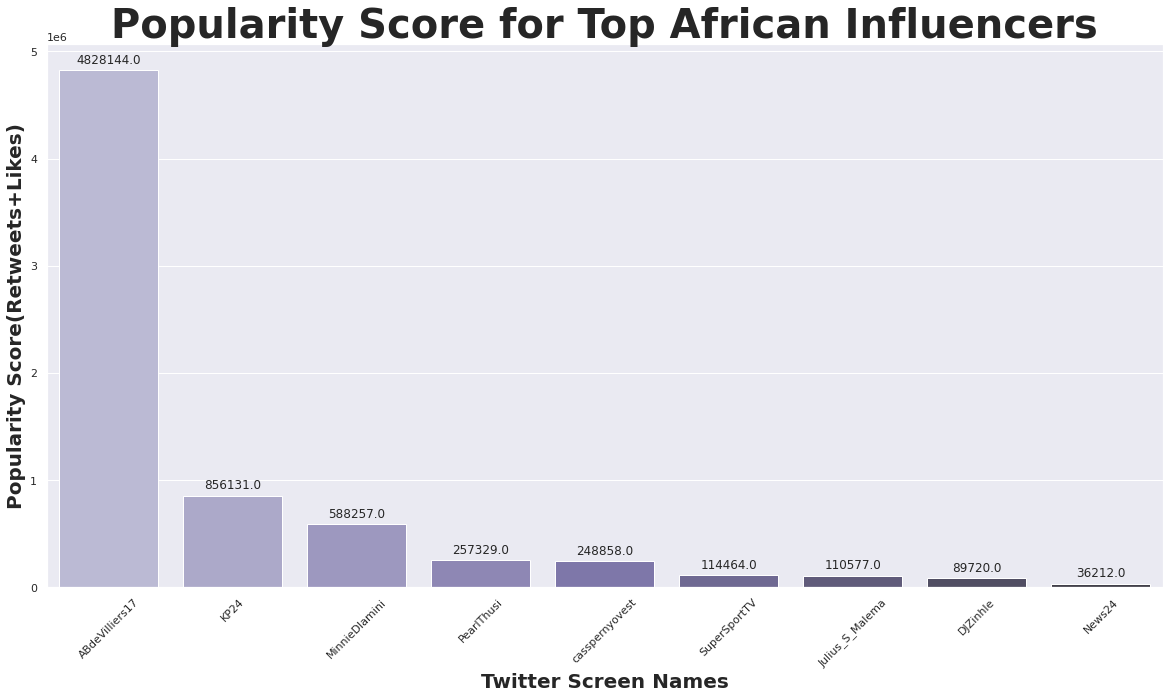

In [32]:
##data visualization - influencers

#bar plot - reach score
plt.figure(figsize=(20,10)) #customizing the size of the plot
sns.set(style="darkgrid") #customizing the style of the plot

#visualizing the data using bar plot
ax = sns.barplot(x='Screen_name', y='Reach_score', palette="Reds_d",
                data=new_inf_df.sort_values(by='Reach_score', ascending=False)[0:10]
                )

#getting the values of the data
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2.,
                            p.get_height()), ha = 'center', va = 'center', 
                            xytext = (0, 10), textcoords = 'offset points')

#setting the parameters for the title, x and y labels of the plot
ax.set_title("Reach Score for Top African Influencers", size=40, weight='bold')
ax.set_xlabel("Twitter Screen Names", size=20, weight='bold')
ax.set_ylabel("Reach Score(Followers-Following)[million]", size=20, weight='bold')

#changing the rotation of the x axis tick labels 
for item in ax.get_xticklabels():
    item.set_rotation(45)
    
plt.savefig('reachinf.png') #saving the figure
plt.show()

#bar plot - popularity score
plt.figure(figsize=(20,10)) #customizing the size of the plot
sns.set(style="darkgrid") #customizing the style of the plot

#visualizing the data using bar plot
ax2 = sns.barplot(x='Screen_name', y='Popularity_score', palette="Purples_d",
                data=new_inf_df.sort_values(by='Popularity_score', ascending=False)[0:10]
                )

#getting the values of the data
for p in ax2.patches:
    ax2.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2.,
                            p.get_height()), ha = 'center', va = 'center', 
                            xytext = (0, 10), textcoords = 'offset points')

#setting the parameters for the title, x and y axis labels of the plot
ax2.set_title("Popularity Score for Top African Influencers", size=40, weight='bold')
ax2.set_xlabel("Twitter Screen Names", size=20, weight='bold')
ax2.set_ylabel("Popularity Score(Retweets+Likes)", size=20, weight='bold')

#changing the rotation of the x axis tick labels
for item in ax2.get_xticklabels():
    item.set_rotation(45)
    
plt.savefig('popularityinf.png')#saving the figure
plt.show()

# **Reference**

Top African Twitter Influencers - https://www.businessinsider.co.za/the-biggest-twitter-profiles-south-africa-trevor-noah-elon-musk-bonang-2019-5